# Christmas Sales Analysis

A businessman who wants to start a business venture during the Christmas period. You have been given data to analyze and give recommendations and insights that can help in the business venture.

In [1]:
# Installing some libraries
!pip install folium --user

In [2]:
# loading the libraries
import folium # for building interactive maps
import pandas as pd # for data manipulation
import numpy as np # for mathematical calculations
import matplotlib.pyplot as plt # for drawing graphs
import seaborn as sns # for drawing graphs

In [30]:
# Importing the dataset
sales = pd.read_excel("Xmas Sales & Trends_English_C22.xlsx")

In [31]:
# checking if it has been imported correctly
sales.head(5)

,Transaction ID,Date,Time,Customer ID,Age,Gender,Location,Longitude,Latitude,Store ID,...,Shipping Method,Payment Type,Delivery Time,Weather during transaction,Event,Return Flag,Customer Satisfaction,Unit Price,Total Price,Discount Amount
0,1,24/12/2020,07:27:59,441,27,Other,Ontario,51.2538,-85.3232,37,...,Standard,Credit Card,5,Snowy,NaN,False,5,96.79,483.93,0.0
1,2,18/11/2022,14:36:39,340,43,Male,British Columbia,53.7267,-127.6476,24,...,Express,Credit Card,3,Sunny,NaN,True,2,95.28,95.28,0.0
2,3,26/12/2019,20:23:50,31,25,Other,Quebec,46.8131,-71.2075,92,...,Standard,Credit Card,2,Rainy,Christmas Market,False,4,52.37,104.74,0.0
3,4,13/11/2018,23:08:08,39,64,Male,Alberta,53.9333,-116.5765,100,...,Standard,Debit Card,1,Rainy,NaN,True,1,63.65,318.24,0.0
4,5,13/12/2020,04:38:08,344,26,Other,Manitoba,53.7609,-98.8139,90,...,Overnight,Cash,4,Sunny,Christmas Market,False,4,57.38,172.15,0.0


### Data Cleaning

##### Missing Values

In [32]:
# checking columns with missing values
sales.isnull().sum()

Transaction ID                   0
Date                             0
Time                             0
Customer ID                      0
Age                              0
Gender                           0
Location                         0
Longitude                        0
Latitude                         0
Store ID                         0
Online Order Flag                0
Product ID                       0
Product Name                     0
Category                         0
Quantity                         0
Promotion Applied                0
Gift Wrap                        0
Shipping Method                  0
Payment Type                     0
Delivery Time                    0
Weather during transaction       0
Event                         2838
Return Flag                      0
Customer Satisfaction            0
Unit Price                       0
Total Price                      0
Discount Amount                  0
dtype: int64

In [33]:
# Replacing the null values with None
sales["Event"]= sales["Event"].fillna("None")

In [34]:
# checking columns with missing values
sales.isnull().sum()

Transaction ID                0
Date                          0
Time                          0
Customer ID                   0
Age                           0
Gender                        0
Location                      0
Longitude                     0
Latitude                      0
Store ID                      0
Online Order Flag             0
Product ID                    0
Product Name                  0
Category                      0
Quantity                      0
Promotion Applied             0
Gift Wrap                     0
Shipping Method               0
Payment Type                  0
Delivery Time                 0
Weather during transaction    0
Event                         0
Return Flag                   0
Customer Satisfaction         0
Unit Price                    0
Total Price                   0
Discount Amount               0
dtype: int64

##### Checking if the Datetypes are okay

In [35]:
# checking the datatype of each
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Transaction ID              10000 non-null  int64  
 1   Date                        10000 non-null  object 
 2   Time                        10000 non-null  object 
 3   Customer ID                 10000 non-null  int64  
 4   Age                         10000 non-null  int64  
 5   Gender                      10000 non-null  object 
 6   Location                    10000 non-null  object 
 7   Longitude                   10000 non-null  float64
 8   Latitude                    10000 non-null  float64
 9   Store ID                    10000 non-null  int64  
 10  Online Order Flag           10000 non-null  bool   
 11  Product ID                  10000 non-null  int64  
 12  Product Name                10000 non-null  object 
 13  Category                    1000

##### Checking if there are duplicates

In [36]:
sales["Transaction ID"].nunique()

10000

There are no duplicates

### Feature Engineering

In [37]:
# Let's add a column for sales after discount
sales["Total Sales"] = sales["Quantity"] * (sales["Unit Price"] - sales["Discount Amount"])

In [38]:
# Let's add a new column for Month and Year from date
sales["Date"] = pd.to_datetime(sales["Date"], format = "%d/%M/%Y")

# Adding a column Month with Months in words
sales["Month"] = sales["Date"].dt.strftime("%B")

# Adding a column Year
sales["Year"] = sales["Date"].dt.year

# preview
sales.head(10)

,Transaction ID,Date,Time,Customer ID,Age,Gender,Location,Longitude,Latitude,Store ID,...,Weather during transaction,Event,Return Flag,Customer Satisfaction,Unit Price,Total Price,Discount Amount,Total Sales,Month,Year
0,1,2020-01-24 00:12:00,07:27:59,441,27,Other,Ontario,51.2538,-85.3232,37,...,Snowy,None,False,5,96.79,483.93,0.00,483.95,January,2020
1,2,2022-01-18 00:11:00,14:36:39,340,43,Male,British Columbia,53.7267,-127.6476,24,...,Sunny,None,True,2,95.28,95.28,0.00,95.28,January,2022
2,3,2019-01-26 00:12:00,20:23:50,31,25,Other,Quebec,46.8131,-71.2075,92,...,Rainy,Christmas Market,False,4,52.37,104.74,0.00,104.74,January,2019
3,4,2018-01-13 00:11:00,23:08:08,39,64,Male,Alberta,53.9333,-116.5765,100,...,Rainy,None,True,1,63.65,318.24,0.00,318.25,January,2018
4,5,2020-01-13 00:12:00,04:38:08,344,26,Other,Manitoba,53.7609,-98.8139,90,...,Sunny,Christmas Market,False,4,57.38,172.15,0.00,172.14,January,2020
5,6,2018-01-26 00:11:00,03:17:17,307,18,Male,Saskatchewan,52.9399,-106.4509,79,...,Rainy,Black Friday,True,3,81.06,81.06,8.11,72.95,January,2018
6,7,2020-01-12 00:08:00,08:26:56,368,63,Female,New Brunswick,46.5653,-66.4619,31,...,Sunny,Christmas Market,True,3,48.16,144.47,0.00,144.48,January,2020
7,8,2020-01-12 00:03:00,16:02:24,121,48,Other,Nova Scotia,45.0778,-63.5467,32,...,Rainy,Black Friday,False,5,97.07,291.21,29.12,203.85,January,2020
8,9,2020-01-11 00:10:00,14:41:38,464,58,Other,Prince Edward Island,46.3188,-63.1461,87,...,Snowy,Black Friday,False,1,34.14,68.28,6.83,54.62,January,2020
9,10,2019-01-16 00:11:00,00:08:13,252,41,Female,Newfoundland and Labrador,54.2731,-61.7388,54,...,Sunny,Black Friday,True,2,37.05,37.05,3.70,33.35,January,2019


# Data Exploration

##### 1. We can first see which country has the most sales to determine the best location to set up our business

In [12]:
# Extracting the columns I need
sales_by_loaction = sales[["Location", "Total Sales"]]

# Grouping the sales by Location
sales_by_location = sales_by_loaction.groupby("Location").sum()

# Removing the index/ Resetting the index
sales_by_loaction = sales_by_loaction.reset_index().sort_values(by ="Total Sales", ascending=False)

# Viewing the data
sales_by_loaction.head()


,index,Location,Total Sales
4227,4227,Northwest Territories,500.00
9947,9947,New Brunswick,499.85
6902,6902,Alberta,499.10
532,532,Ontario,498.45
6659,6659,Saskatchewan,498.15


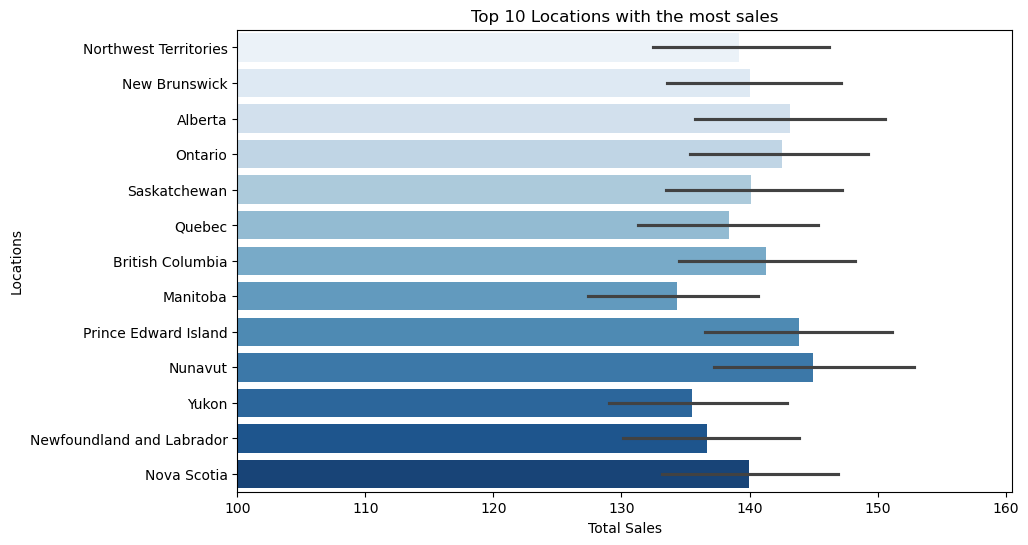

In [13]:
# Visualizing the Top 10 locations with the most Sales
plt.figure(figsize=(10, 6))
sns.barplot(y= sales_by_loaction["Location"], x= sales_by_loaction["Total Sales"], hue = sales_by_loaction["Location"], palette = "Blues")
plt.title("Top 10 Locations with the most sales")
plt.ylabel("Locations")
plt.xlabel("Total Sales")
plt.xlim(100)
plt.show()

##### 2. Determining which Product Category had the most sales

In [14]:
# Extracting the columns to use
category_sales = sales[["Category", "Total Sales"]]

# grouping the data based on category
category_sales = category_sales.groupby("Category").sum()

# creating a list of colours
# colours = ["Red", "Blue", "Green", "Gray", "black", "white", "purple", "indigo"]
colours = ["Red", "Blue", "Green", "Gray", "black"]

# Reseting the index and sorting values
category_sales =category_sales.reset_index().sort_values(by ="Total Sales", ascending=False)

# printing out the values
category_sales.head()

,Category,Total Sales
4,Toys,288445.71
3,Food,282891.41
2,Electronics,282777.08
1,Decorations,274989.00
0,Clothing,271146.77


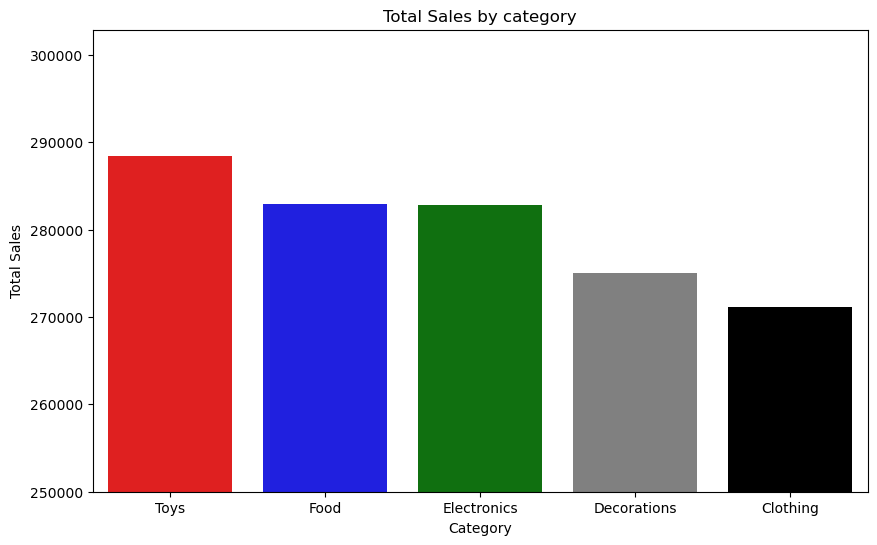

In [15]:
# Visualizing the data
plt.figure(figsize =(10, 6))
sns.barplot(x= category_sales["Category"], y =category_sales["Total Sales"], hue = category_sales["Category"], palette= colours, legend =False)
plt.title("Total Sales by category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.ylim(250000)
plt.show()

##### 3. Let's Check the Total Sales based on gender and Gift Wrap and the Gender Distribution

In [16]:
# Gender Distribution
#Extracting the needed columns
Total_sales_gender = sales[["Gender", "Transaction ID"]]

# Grouping by Gender
Total_sales_gender = Total_sales_gender.groupby("Gender")["Transaction ID"].count()

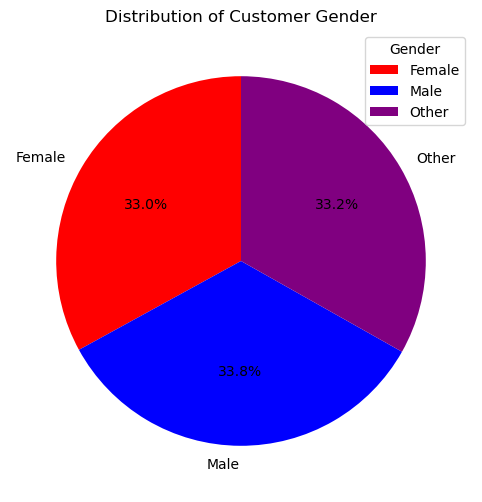

In [17]:
# visualization
plt.figure(figsize= (10, 6))
plt.pie(Total_sales_gender, labels = Total_sales_gender.index, colors= ["Red", "Blue", "Purple"], startangle=90, autopct='%1.1f%%')
plt.title("Distribution of Customer Gender")
plt.legend(title= "Gender")
plt.show()

In [18]:
# Extracting the columns needed
Total_sales_gender_gift = sales[["Total Sales", "Gender", "Gift Wrap"]]

# Grouping by Gender and Wrap
Total_sales_gender_gift = Total_sales_gender_gift.groupby(["Gender", "Gift Wrap"]).sum()

# Resetting the Index and sorting by sales
Total_sales_gender_gift = Total_sales_gender_gift.reset_index().sort_values(by="Total Sales", ascending=False)

# Checking how the first columns look like
Total_sales_gender_gift.head(10)

,Gender,Gift Wrap,Total Sales
3,Male,True,238713.00
5,Other,True,238188.91
0,Female,False,234026.92
4,Other,False,233024.24
2,Male,False,229727.32
1,Female,True,226569.58


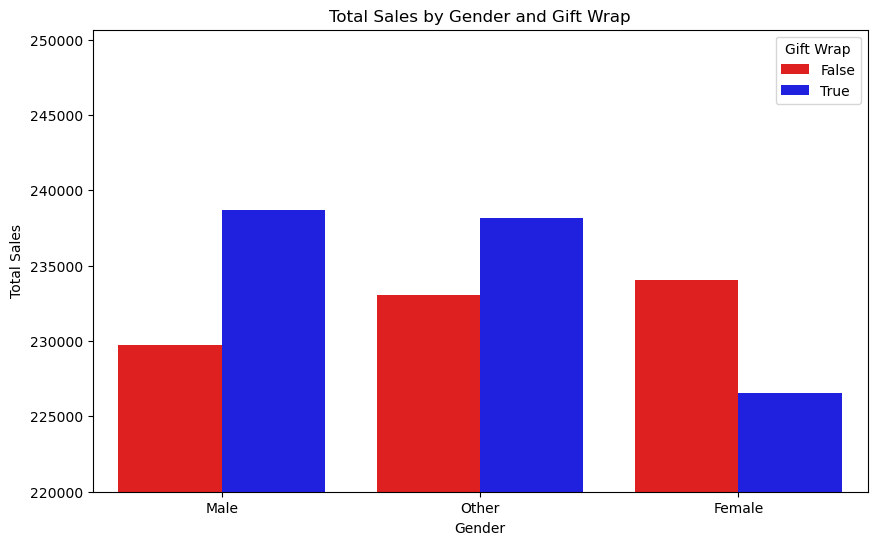

In [19]:
# Visualization of the data
plt.figure(figsize =(10, 6))
sns.barplot(x = Total_sales_gender_gift["Gender"], y = Total_sales_gender_gift["Total Sales"], hue = Total_sales_gender_gift["Gift Wrap"], palette = ["Red", "Blue"], dodge= True)
plt.title("Total Sales by Gender and Gift Wrap")
plt.ylabel("Total Sales")
plt.ylim(220000)
plt.xlabel("Gender")
plt.legend(title="Gift Wrap")
plt.show()

##### 4. Prefered Method of Payment

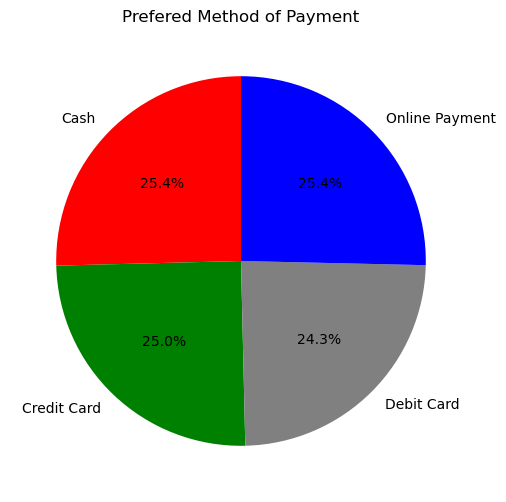

In [20]:
# Extracting the columns we are using and 
distribution_payment = sales[["Payment Type", "Transaction ID"]]

# Grouping by Payment type
distribution_payment = distribution_payment.groupby("Payment Type")["Transaction ID"].count()

# Visualization
plt.figure(figsize = (10, 6))
plt.pie(distribution_payment, labels = distribution_payment.index, colors = ["Red", "Green", "Gray", "blue"], startangle= 90, autopct='%1.1f%%')
plt.title("Prefered Method of Payment")
plt.show()

##### 5. Total Sales by Event

In [21]:
# Extracting the columns we need
total_sales_event = sales[["Total Sales", "Event"]]

# grouping total sales by Event
total_sales_event = total_sales_event.groupby("Event").sum()

# a glimpse of the output
total_sales_event.head()

,Total Sales
Event,
Black Friday,441444.76
Christmas Market,483573.55
None,475231.66


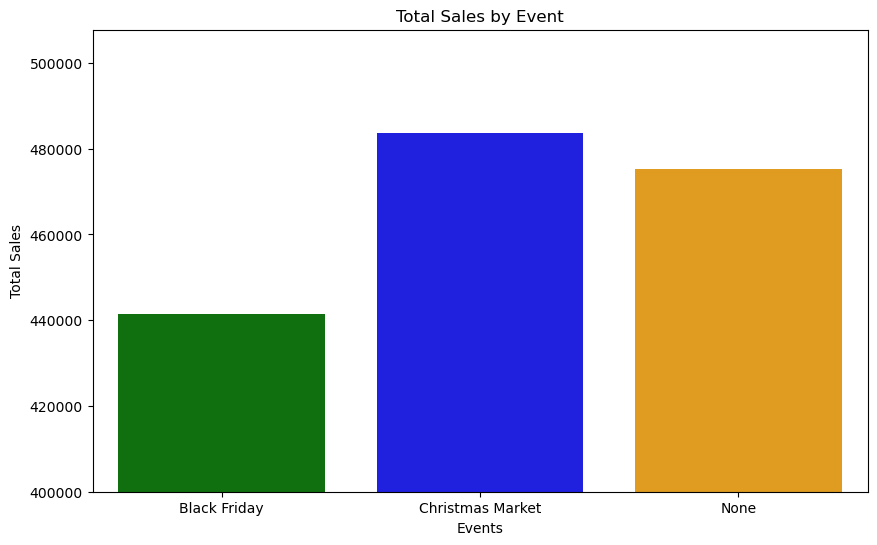

In [22]:
# Visualizing the data in a bar chart
plt.figure(figsize =(10, 6))
sns.barplot(x = total_sales_event.index, y = total_sales_event["Total Sales"], hue = total_sales_event.index, palette = ["Green", "Blue", "Orange"])
plt.title("Total Sales by Event")
plt.xlabel("Events")
plt.ylabel("Total Sales")
plt.ylim(400000)
plt.show()

In [39]:
# Trend Analysis of Total No of Sales made on a yearly basis
#Extracting thecolumns needed
total_sales_trend = sales[["Year", "Total Sales"]]

# grouping the total sales by Month
total_sales_trend = total_sales_trend.groupby("Year").sum().reset_index()

# Creating a custom sort
#custom_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# converting a column the dataset
#total_sales_trend["Month"]= pd.Categorical(total_sales_trend["Month"], categories = custom_order, ordered = True)

#sorting the dataset by Months
total_sales_trend= total_sales_trend.sort_values("Year")

# preview
total_sales_trend.head(5)

,Year,Total Sales
0,2018,242587.38
1,2019,225169.94
2,2020,231306.20
3,2021,234398.48
4,2022,225070.24


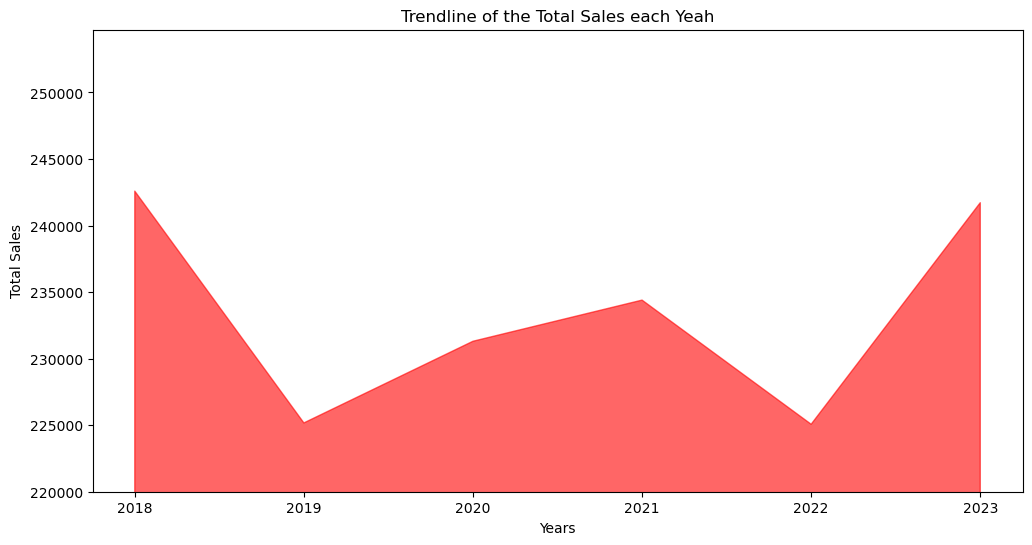

In [44]:
# Visualization in an Area Chart
plt.figure(figsize = (12, 6))

plt.fill_between(total_sales_trend["Year"],total_sales_trend["Total Sales"], color = "red", label = "Total Sales", alpha = 0.6)

plt.title("Trendline of the Total Sales each Yeah")
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.ylim(220000)
plt.show()